In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [131]:
# import tables as dataframes
ella = pd.read_csv('ella_csp.csv')
emily = pd.read_csv('emily_csp.csv')
anish = pd.read_csv('anish_csp.csv')
inter = ella[ella.obj_id != '2007le']
ella_final = inter[inter.obj_id != '2008ia']

FileNotFoundError: [Errno 2] File b'ella_csp.csv' does not exist: b'ella_csp.csv'

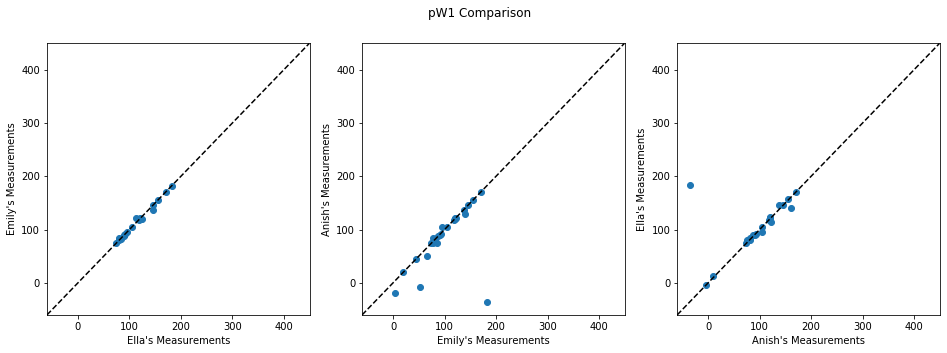

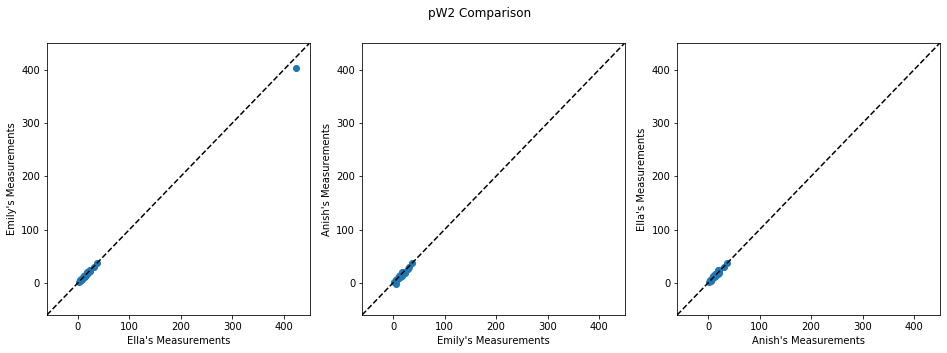

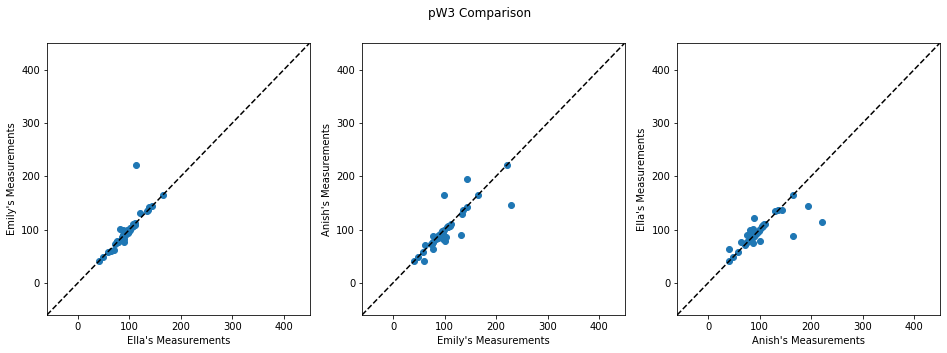

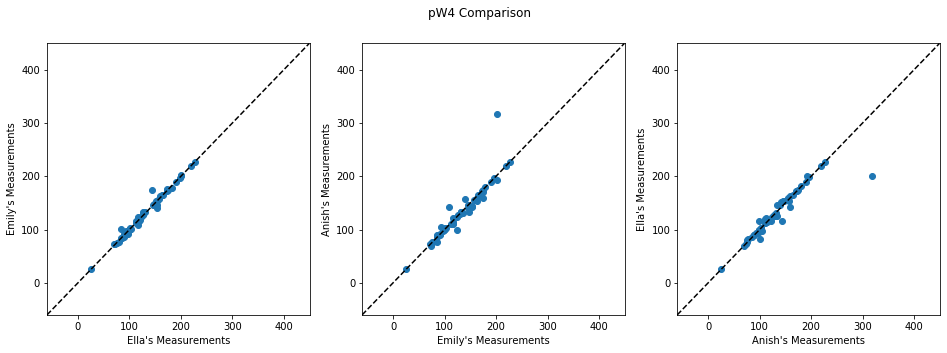

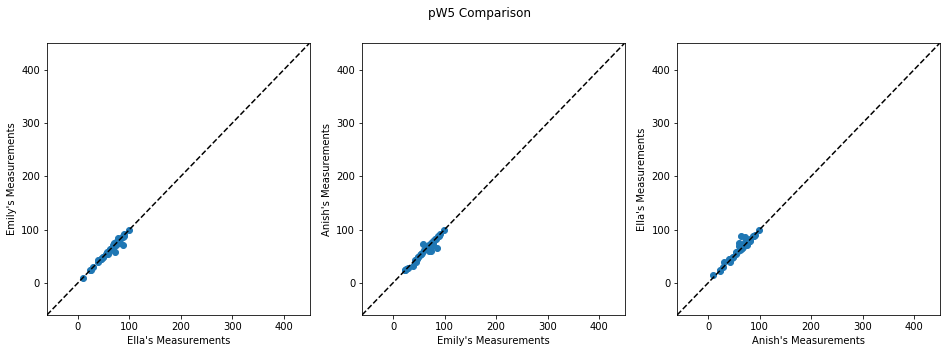

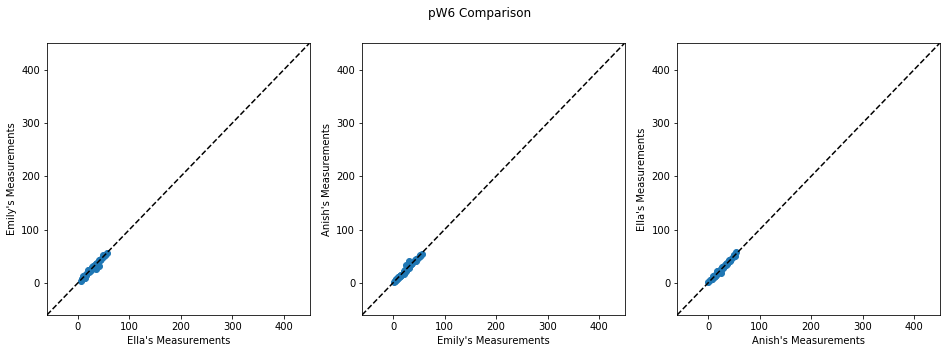

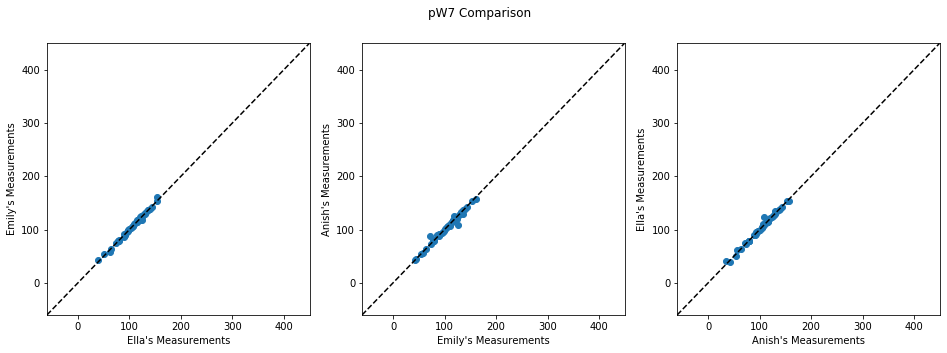

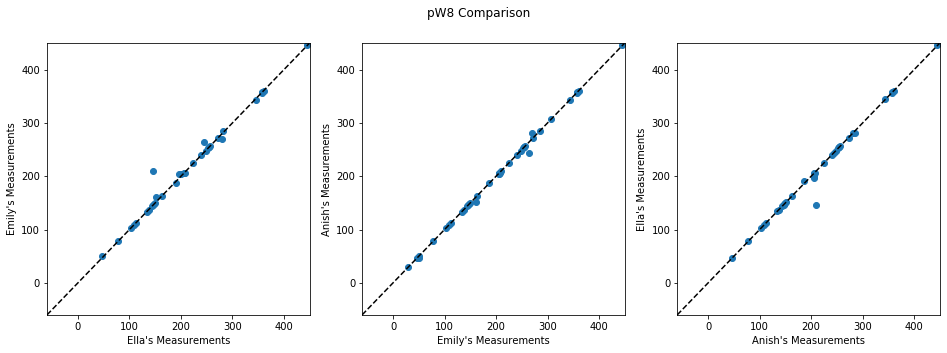

In [126]:
# printing all features

# Need to make tables of shared features and obj ids between each 
# pair of people for each feature
for feat_name in ['pW1', 'pW2', 'pW3', 'pW4', 'pW5', 'pW6', 'pW7', 'pW8']:
    
    '''leftmost figure (ella vs. emily) information'''
    
    # identifying only rows with a specific feature measurement
    ella_feat = ella[ella['feat_name'] == feat_name]
    emily_feat = emily[emily['feat_name'] == feat_name]
   
    # setting indices to shared values
    ella_feat_2 = ella_feat.set_index(['obj_id', 'time', 'feat_name'])
    emily_feat_2 = emily_feat.set_index(['obj_id', 'time', 'feat_name'])
    
    # combining the two tables
    combined_feat = ella_feat_2.join(emily_feat_2, lsuffix="ella", rsuffix='emily')

    # dropping NaNs, ie rows without shared measurements
    final_feat = combined_feat.dropna(subset=['pewella', 'pewemily'])
    
    # data to be plotted
    ella_data_fig1 = final_feat['pewella']
    emily_data_fig1 = final_feat['pewemily']

    '''middle figure (emily vs. anish), exact same process as above'''

    emily_feat = emily[emily['feat_name'] == feat_name]
    anish_feat = anish[anish['feat_name'] == feat_name]
    
    emily_feat_2 = emily_feat.set_index(['obj_id', 'time', 'feat_name'])
    anish_feat_2 = anish_feat.set_index(['obj_id', 'time', 'feat_name'])
    
    combined_feat2 = emily_feat_2.join(anish_feat_2, lsuffix="emily", rsuffix='anish')

    final_feat2 = combined_feat2.dropna(subset=['pewemily', 'pewanish'])
    
    # data to be plotted
    emily_data_fig2 = final_feat2['pewemily']
    anish_data_fig2 = final_feat2['pewanish']

    '''rightmost figure (anish vs. ella), exact same process as above'''

    anish_feat = anish[anish['feat_name'] == feat_name]
    ella_feat = ella[ella['feat_name'] == feat_name]
    
    anish_feat_2 = anish_feat.set_index(['obj_id', 'time', 'feat_name'])
    ella_feat_2 = ella_feat.set_index(['obj_id', 'time', 'feat_name'])
    
    combined_feat3 = anish_feat_2.join(ella_feat_2, lsuffix="anish", rsuffix='ella')

    final_feat3 = combined_feat3.dropna(subset=['pewanish', 'pewella'])
    
    # data to be plotted
    anish_data_fig3 = final_feat3['pewanish']
    ella_data_fig3 = final_feat3['pewella']

    # data to plot the line y=x, goes from the minimum measurement in all three sets to the maximum (roughly)
    # I set the scale on all of the plots the same so they look organized stacked, but this can easily be undone
    # by plotting a specific feature with its respective measurement range
    x = np.arange(-60, 450)

    # plotting the information
    
    # creating the figure
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 5), sharex=False)
    fig.suptitle(f'{feat_name} Comparison')
    
    # plotting the leftmost figure
    ax1.scatter(ella_data_fig1, emily_data_fig1)
    ax1.plot(x, x, color='black', linestyle='--')
    ax1.set_xlim(-60, 450)
    ax1.set_ylim(-60, 450)
    ax1.set_xlabel("Ella's Measurements")
    ax1.set_ylabel("Emily's Measurements")
    
    # plotting the middle figure
    ax2.scatter(emily_data_fig2, anish_data_fig2)
    ax2.plot(x, x, color='black', linestyle='--')
    ax2.set_ylim(-60, 450)
    ax2.set_xlim(-60, 450)
    ax2.set_xlabel("Emily's Measurements")
    ax2.set_ylabel("Anish's Measurements")
    
    # plotting the rightmost figure
    ax3.scatter(anish_data_fig3, ella_data_fig3)
    ax3.plot(x, x, color='black', linestyle='--')
    ax3.set_ylim(-60, 450)
    ax3.set_xlim(-60, 450)
    ax3.set_xlabel("Anish's Measurements")
    ax3.set_ylabel("Ella's Measurements")
    
    #plt.savefig(f"{feat_name}comparison.png")

In [127]:
ella

,obj_id,time,feat_name,feat_start,feat_end,vel,vel_err,vel_samperr,pew,pew_err,pew_samperr,area,area_err,area_samperr,notes
0,2004ef,2453255.66,pW1,3762.7879,3921.8518,NaN,0.0,NaN,13.486097,0.0,8.617782,4.261588e-15,0.0,4.084292e-15,NaN
1,2004ef,2453255.66,pW2,3929.0819,4068.8654,NaN,0.0,NaN,12.432846,0.0,3.538539,7.091278e-15,0.0,2.246094e-15,NaN
2,2004ef,2453255.66,pW3,4073.6855,4483.3956,13272.971380,0.0,147.966785,86.949994,0.0,6.117037,5.368383e-14,0.0,4.812280e-15,"Tried to extend feature 3 as far as possible, ..."
3,2004ef,2453255.66,pW4,4500.2660,5061.8098,21906.333775,0.0,241.564916,174.768556,0.0,7.198777,9.398515e-14,0.0,5.704729e-15,NaN
4,2004ef,2453255.66,pW5,5172.6725,5601.6630,8797.440700,0.0,373.094934,77.613915,0.0,4.167822,2.784962e-14,0.0,1.867114e-15,For feature 5 I made the left bound farther to...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,2009ag,2454885.63,pW4,4527.3224,5118.3328,17990.965162,0.0,121.038531,145.155597,0.0,3.440187,1.520179e-12,0.0,4.801173e-14,Excluding the FeII SII W dip
337,2009ag,2454885.63,pW5,5208.7936,5555.5600,8006.588786,0.0,124.836711,67.846124,0.0,1.994622,4.854239e-13,0.0,1.802664e-14,NaN
338,2009ag,2454885.63,pW6,5594.7596,5911.3724,8946.671604,0.0,46.191096,15.765346,0.0,1.123412,8.722436e-14,0.0,6.706780e-15,NaN
339,2009ag,2454885.63,pW7,5914.3877,6327.4920,10258.083429,0.0,5.559558,104.919371,0.0,0.494985,5.417550e-13,0.0,3.479709e-15,NaN
